---
title: "Mountain Classifier"
description: "A simple classifier to distinguish between Matterhorn and Assiniboine mountains using fastai."
author: "Sasipim"
date: "2025-10-20"
image: "images/matterhorn.jpg"
categories:
    - fastai
---



## Mountain classifier
## Matterhorn vs Assiniboine ("Matterhorn of the Rockies")

In [1]:
#| include: false

!pip install -Uqq fastai ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.4 MB/s eta 0:00:00


In [2]:
from ddgs import DDGS
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

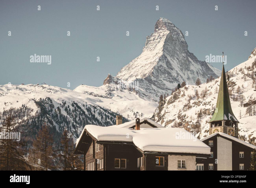

In [3]:
from fastdownload import download_url
from fastai.vision.all import *

download_url(search_images('matterhorn in winter', max_images=1)[0], 'matterhorn.jpg', show_progress=False)
Image.open('matterhorn.jpg').to_thumb(256,256)

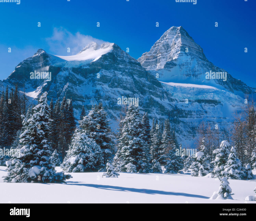

In [4]:
download_url(search_images('assiniboine in winter', max_images=1)[0], 'assiniboine.jpg', show_progress=False)
Image.open('assiniboine.jpg').to_thumb(256,256)

In [5]:
searches = 'matterhorn','assiniboine'
path = Path('matterhorn_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} in winter'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

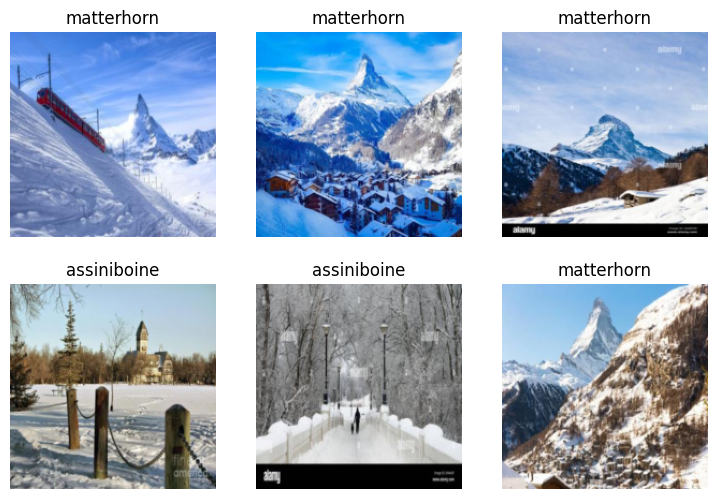

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 113MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.992223,1.174857,0.411765,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.388923,0.677145,0.352941,00:32


KeyboardInterrupt: 

In [ ]:
is_matterhorn,_,probs = learn.predict(PILImage.create('matterhorn.jpg'))
print(f"This is a: {is_matterhorn}.")
print(f"Probability it's a matterhorn: {probs[1]:.4f}")

In [ ]:
is_matterhorn,_,probs = learn.predict(PILImage.create('assiniboine.jpg'))
print(f"This is a: {is_matterhorn}.")
print(f"Probability it's a assiniboine: {probs[0]:.4f}")

## Multi-class classification

In [ ]:
# Add another 2 classes
searches = 'mont blanc','titlis'
path = Path('matterhorn_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} in winter'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [ ]:
learn = vision_learner(dls, resnet101, metrics=error_rate) #ยิ่ง model ใหญ่ยิ่งเก่ง resnet101 train 5 ครั้ง เก่งกว่า resnet50 train 10 ครั้งอีก
learn.fine_tune(5)

In [ ]:
print(f"Class names: {learn.dls.vocab}")

In [ ]:
mountain_name,_,probs = learn.predict(PILImage.create('matterhorn.jpg'))
print(f"This is a: {mountain_name}.")
print(f"Probability it's a matterhorn: {probs[1]:.4f}")

In [ ]:
mountain_name,_,probs = learn.predict(PILImage.create('assiniboine.jpg'))
print(f"This is a: {mountain_name}.")
print(f"Probability it's a assiniboine: {probs[0]:.4f}")

In [ ]:
mountain_name,_,probs = learn.predict(PILImage.create('mont blanc.jpg'))
print(f"This is a: {mountain_name}.")
print(f"Probability it's a mont blanc: {probs[2]:.4f}")

In [ ]:
mountain_name,_,probs = learn.predict(PILImage.create('titlis.jpg'))
print(f"This is a: {mountain_name}.")
print(f"Probability it's a titlis: {probs[3]:.4f}")